# Random Circuits

Random quantum circuits are an essential concept in quantum computing, serving as a key tool for understanding and exploiting the behavior of quantum systems. Random quantum circuits are composed of sequences of quantum gates applied in a random order to a set of qubits, the fundamental building blocks of quantum information. This randomness helps to simulate and study the complex dynamics of quantum systems, a task that classical computers struggle with due to the exponential growth of the state space with the number of qubits. I will introduce the concept of random circuits by building them, and showing the "signal" that is outputted.

In [1]:
import qiskit
import qiskit_aer
import numpy
import matplotlib.pyplot as plt
import time
from qiskit import Aer, execute, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix, entropy
from qiskit.circuit.random import random_circuit
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Creating a Signal with a Random Circuit

On each run of the function below, a series of random single/multi qubit gates are applied to a circuit. The "signal" output can be seen in the 3D histograms.

In [3]:
import random
def fully_random_circuit(num_qubits, draw=False) : 
    x_gate = lambda qc, qubit: qc.x(qubit) 
    y_gate = lambda qc, qubit: qc.y(qubit)
    z_gate = lambda qc, qubit: qc.z(qubit)
    h_gate = lambda qc, qubit: qc.h(qubit)
    s_gate = lambda qc, qubit: qc.s(qubit)
    sdg_gate = lambda qc, qubit: qc.sdg(qubit)
    t_gate = lambda qc, qubit: qc.t(qubit)
    tdg_gate = lambda qc, qubit: qc.tdg(qubit)
    cx_gate = lambda qc, control, target: qc.cx(control, target)
    cy_gate = lambda qc, control, target: qc.cy(control, target)
    cz_gate = lambda qc, control, target: qc.cz(control, target)
    ccx_gate = lambda qc, control1, control2, target: qc.ccx(control1, control2, target)
    swap_gate = lambda qc, qubit1, qubit2: qc.swap(qubit1, qubit2)
    random1 = [x_gate, y_gate, z_gate, h_gate, s_gate, sdg_gate, t_gate, tdg_gate]
    random2 = [cx_gate, cy_gate, cz_gate, swap_gate]
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits, global_phase=0)
    for qubit in range(num_qubits) :
        qc.h(qubit)
    r1=0
    r2=0
    r3=0
    for i in range(num_qubits) :
        while(i == 0 and (r1 == r2 or r1 == r3 or r2 == r3)) :
            r1 = random.randint(0, num_qubits-1)
            r2 = random.randint(0, num_qubits-1)
            r3 = random.randint(0, num_qubits-1)
        random1[random.randint(0, 7)](qc, r1)
        random2[random.randint(0, 3)](qc, r2, r3)
        qc.ccx(r1, r2, r3)
        r1=r1+1
        r2=r2+1
        r3=r3+1
        if(r1 >= num_qubits) :
            r1=0
        if(r2 >= num_qubits) :
            r2=0
        if(r3 >= num_qubits) :
            r3=0
    backend = qiskit_aer.Aer.get_backend('statevector_simulator')
    job = backend.run(qc, shots = 2**num_qubits)
    result = job.result()
    outputstate = result.get_statevector(qc, decimals=3)

    if draw :
        display(qiskit.visualization.plot_state_city(outputstate))
        display(qc.draw(style='iqp'))

    return qc


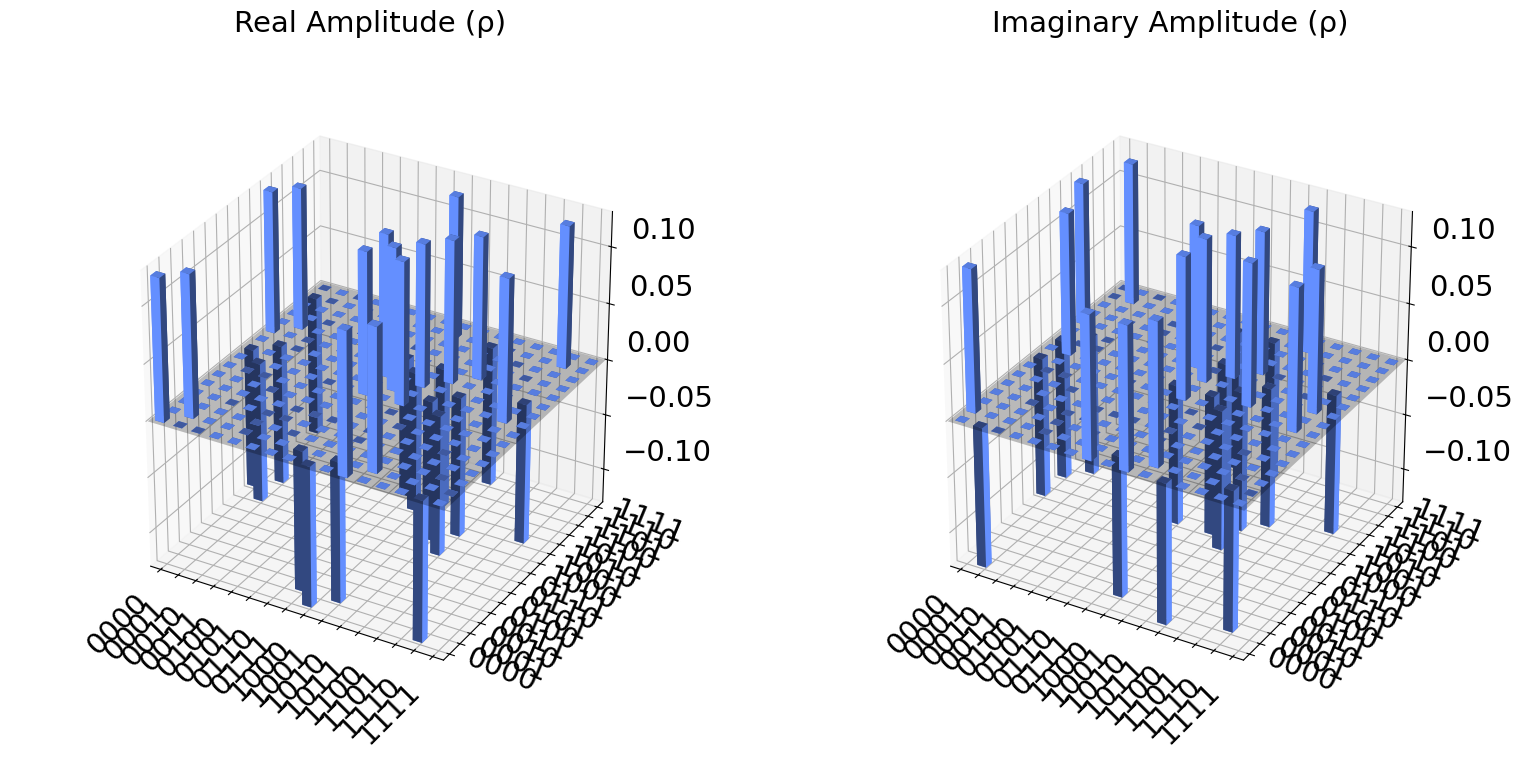

┌───┐        ┌───┐          ┌─────┐               
q_0: ┤ H ├──────X─┤ X ├──■────■──┤ Sdg ├────────────■──
     ├───┤┌───┐ │ └─┬─┘┌─┴─┐┌─┴─┐└─────┘            │  
q_1: ┤ H ├┤ Z ├─┼───■──┤ X ├┤ X ├───■─────■─────────┼──
     ├───┤├───┤ │   │  └───┘└─┬─┘ ┌─┴─┐ ┌─┴─┐       │  
q_2: ┤ H ├┤ H ├─┼───┼─────────■───┤ X ├─┤ X ├──■────■──
     ├───┤└───┘ │   │  ┌───┐      └───┘ └─┬─┘┌─┴─┐┌─┴─┐
q_3: ┤ H ├──────X───■──┤ Z ├──────────────■──┤ X ├┤ X ├
     └───┘             └───┘                 └───┘└───┘
c: 4/══════════════════════════════════════════════════

In [4]:
qc1 = fully_random_circuit(4, True)

# Creating a Random Circuit with Specific Number of Qubits and Circuit Layers

In the code below, I have created a function that creates a random circuit based on qubit size and preferred depth (in terms of number of gates, not actual depth). It uses a combination of single qubit gates as well as multi qubit gates applied to the qubits in a random order.

In [6]:
import random
def fully_random_sized_circuit(num_qubits, width, draw=False) : 
    single_gates = [
    lambda qc, qubit: qc.h(qubit),
    lambda qc, qubit: qc.s(qubit),
    lambda qc, qubit: qc.sdg(qubit),
    lambda qc, qubit: qc.t(qubit),
    lambda qc, qubit: qc.tdg(qubit),
    lambda qc, qubit: qc.rx(3.14, qubit),
    lambda qc, qubit: qc.ry(3.14, qubit),
    lambda qc, qubit: qc.rz(3.14, qubit),
    lambda qc, qubit: qc.p(3.14, qubit),
    lambda qc, qubit: qc.sx(qubit),
    lambda qc, qubit: qc.i(qubit) ]
    multi_gates = [
    lambda qc, qubit: qc.cx(qubit, qubit+1),
    lambda qc, qubit: qc.cy(qubit, qubit+1),
    lambda qc, qubit: qc.cz(qubit, qubit+1),
    lambda qc, qubit: qc.swap(qubit, qubit+1),
    lambda qc, qubit: qc.crx(3.14, qubit, qubit+1),
    lambda qc, qubit: qc.cry(3.14, qubit, qubit+1),
    lambda qc, qubit: qc.crz(3.14, qubit, qubit+1),
    lambda qc, qubit: qc.rxx(3.14, qubit, qubit+1) ]
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits, global_phase=0)
    for qubit in range(num_qubits) :
        qc.h(qubit)
    r1=0
    r2=0
    r3=0
    for k in range(width) :
        for i in range(num_qubits) :
            rs = random.randint(0,10)
            rm = random.randint(0,7)
            if( i == num_qubits-1) :
                single_gates[rs](qc, i)
            else :
                coin = random.randint(0,1)
                if(coin == 1) :
                    single_gates[rs](qc,i)
                else :
                    multi_gates[rm](qc,i)
    backend = qiskit_aer.Aer.get_backend('statevector_simulator')
    new_qc = transpile(qc, backend=backend)
    job = backend.run(new_qc, shots = 2**num_qubits)
    result = job.result()
    outputstate = result.get_statevector(qc, decimals=3)

    if draw :
        display(qiskit.visualization.plot_state_city(outputstate))
        display(qc.draw(style='iqp'))

    return qc

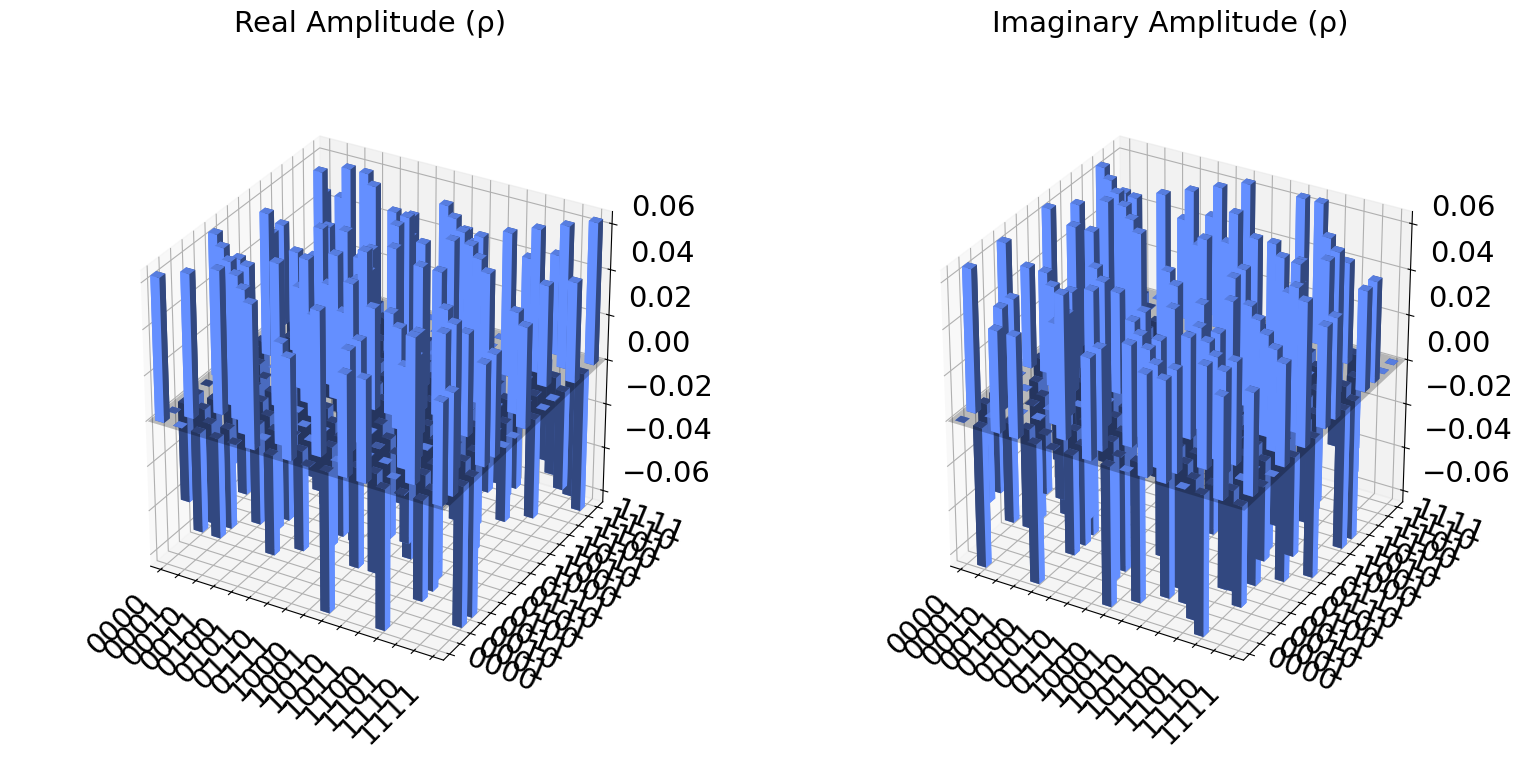

┌───┐               ┌───┐       ┌───┐                                   »
q_0: ┤ H ├─────■─────────┤ S ├───────┤ T ├─────────────────────■─────────────»
     ├───┤┌────┴─────┐┌──┴───┴───┐  ┌┴───┴┐               ┌────┴─────┐       »
q_1: ┤ H ├┤ Rx(3.14) ├┤ Ry(3.14) ├──┤ Tdg ├────────■──────┤ Ry(3.14) ├───■───»
     ├───┤└──────────┘└──────────┘  └─────┘   ┌────┴─────┐└──────────┘ ┌─┴─┐ »
q_2: ┤ H ├─────■───────────────────────■──────┤ Rz(3.14) ├─────■───────┤ Y ├─»
     ├───┤┌────┴─────┐   ┌───┐    ┌────┴─────┐├──────────┤┌────┴─────┐┌┴───┴┐»
q_3: ┤ H ├┤ Rx(3.14) ├───┤ T ├────┤ Ry(3.14) ├┤ Rx(3.14) ├┤ Ry(3.14) ├┤ Tdg ├»
     └───┘└──────────┘   └───┘    └──────────┘└──────────┘└──────────┘└─────┘»
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                        
«q_0: ───────────────────
«                        
«q_1: ───────────────────
«     ┌────────────┐     
«q_2: ┤0           ├─────
«     │  Rxx(3.14) │┌───┐
«q_3: ┤1           ├┤ I ├
«     └────────────┘└───┘
«c: 4/═══════════════════
«

In [66]:
qc5 = fully_random_sized_circuit(4, 4, True)

# Creating a 'Periodic' Random Circuit

Below is a function that generates a "random" circuit that uses only single qubit gates. This allows for specifying the actual depth that you want for the circuit (period) and the number of times you want this construction to repeat (layers) in the final circuit.

In [5]:
def create_periodic_random(num_qubits, period, layers, draw=False) :
    single_gates = [
    lambda qc, qubit: qc.h(qubit),
    lambda qc, qubit: qc.s(qubit),
    lambda qc, qubit: qc.sdg(qubit),
    lambda qc, qubit: qc.t(qubit),
    lambda qc, qubit: qc.tdg(qubit),
    lambda qc, qubit: qc.rx(3.14, qubit),
    lambda qc, qubit: qc.ry(3.14, qubit),
    lambda qc, qubit: qc.rz(3.14, qubit),
    lambda qc, qubit: qc.p(3.14, qubit),
    lambda qc, qubit: qc.sx(qubit),
    lambda qc, qubit: qc.i(qubit) ]
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits, global_phase=0)
    r1=0
    r2=0
    r3=0
    for l in range(layers) :
        for k in range(period) :
            for i in range(num_qubits) :
                rs = random.randint(0,10)
                single_gates[rs](qc, i)
    return qc

# NOTE TO READER: Qiskit always measures in the Z-basis, so unless otherwise stated, all the measurements I have made are in the Z-basis.

# Calculating Shannon Entropy of a Quantum System

Entropy, a measure of disorder/uncertainty, can act as a great way to characterize the randomness of a quantum circuit because it can be normalized and benchmarked against minimum and maximum values. In the code below, I have written a function that calculates the Shannon entropy of a random circuit.

In [2]:
def calculate_shannon_entropy(qc, num, draw=False) :
    backend = qiskit_aer.Aer.get_backend('statevector_simulator')
    new_qc = transpile(qc, backend=backend)
    job = backend.run(new_qc, shots = 1024)
    result = job.result()
    outputstate = result.get_statevector()
    probs = Statevector(outputstate).probabilities()
    shan = shentropy(probs, base=2)
    
    if draw :
        display(qiskit.visualization.plot_state_city(outputstate))
        display(qc.draw(style='iqp'))

    return shan

def shentropy(pvec, base) :
    if base == 2:

        def logfn(x):
            return -x * numpy.log2(x)
    elif base == np.e:

        def logfn(x):
            return -x * numpy.log(x)
    else:

        def logfn(x):
            return -x * numpy.log(x) / numpy.log(base)

    h = 0.
    for x in pvec:
        if 0 < x < 1:
            h += logfn(x)
    return h

In [9]:
calculate_shannon_entropy(qc5, 4)

3.9999963405399943

# Plotting the Shannon Entropies Against Number of Qubits

Since the entropy of random quantum circuits changes based on the makeup of the circuit, I have written a function that can run a specific number of trials of calculating Shannon entropy for circuits of varying qubit size. On most of my function calls for this, I chose to run 100 trials so that the code doesn't take too long to run and so that I can still get an accurate spread of data. The data gathered from the trials are written to a csv, and then the data is pulled from the csv to construct a box plot that shows the entropies for different numbers of qubits.

In [10]:
import csv
def run_shan_entropies_by_qubit_size(num_qubits, trials) :
    shan_entries = []
    for k in range(trials) :
        for i in range(num_qubits) :
            if i==0 :
                continue
            else :
                temp = fully_random_sized_circuit(i,i, False)
                shan = calculate_shannon_entropy(temp, i, False)
                shan = shan/i
                shan_entries.append((i, shan))

    with open('shannon_data.csv', 'w', newline='') as csvfile :
        writer = csv.writer(csvfile)
        writer.writerow(['Qubit Number', 'Entropy'])
    
        for qubit_number, entropy in shan_entries:
            writer.writerow([qubit_number, entropy])

    

In [8]:
run_shan_entropies_by_qubit_size(15, 100)

# Plotting the Data

The code below uses pandas to read the data from a csv and group it by number of qubits, and then uses boxplot to plot the data (in terms of average, min, max, outliers).

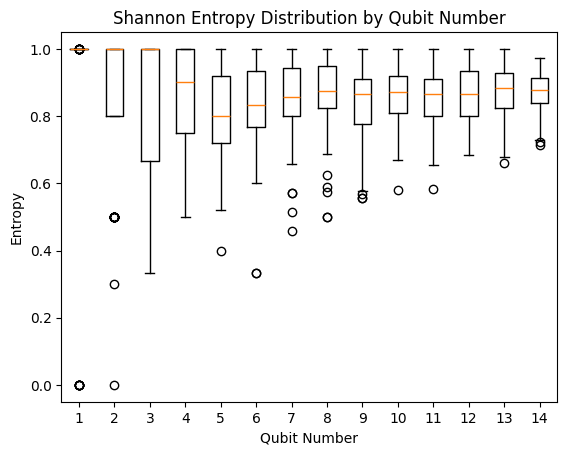

In [9]:
import pandas as pd

df = pd.read_csv('shannon_data.csv')
grouped_data = df.groupby('Qubit Number')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Qubit Number'].astype(str))
ax.set_title('Shannon Entropy Distribution by Qubit Number')
ax.set_xlabel('Qubit Number')
ax.set_ylabel('Entropy')
plt.show()

**Interpretation:** With an increasing number of qubits, the Shannon entropy seems to average out to around 0.8, telling me that they are getting more "random" on average than few qubit circuits.

# Plotting the Shannon Entropies Against Circuit Depth

Similar to the notebook cells above, I have written a function that generates random circuits of varying depth for a given number of qubits. In order to get an accurate data spread, the code runs a certain number of trials, and then plots the data from the trials on a boxplot. The depth varies by a multiple of 5 on each increment, and outliers under a certain threshold (0.6 for depths greater than 50) are written to a csv file.

In [4]:
import csv
def run_shan_entropies_by_depth(num_qubits, depth, trials) :
    outliers = []
    shan_entries = []
    for k in range(trials) :
        for i in range(depth) :
            if i==0 :
                continue
            else :
                temp = fully_random_sized_circuit(num_qubits,i*5, False)
                shan = calculate_shannon_entropy(temp, num_qubits, False)
                shan = shan/num_qubits
                if( ((i*5) >= 50) and shan < 0.6) :
                    outliers.append(temp)
                shan_entries.append((i*5, shan))

    with open('shannon_data_depth.csv', 'w', newline='') as csvfile :
        writer = csv.writer(csvfile)
        writer.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in shan_entries:
            writer.writerow([depth, entropy])

    return outliers

In [7]:
outliers = run_shan_entropies_by_depth(4, 15, 100)
with open('shannon_outlier_data.csv', 'w', newline='') as csvfile :
        writer = csv.writer(csvfile)
        writer.writerow(['Circuit'])
    
        for qc in outliers:
            writer.writerow(qc)

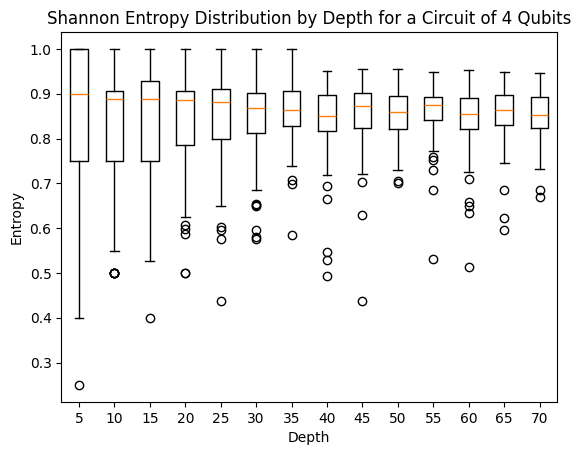

In [8]:
import pandas as pd

df = pd.read_csv('shannon_data_depth.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Circuit of 4 Qubits')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

**Interpretation:** With an increasing depth and 4 qubits, the Shannon entropy seems to average out to around 0.85, telling me that deeper circuits are more "random" in the Z-basis on average than shallow circuits.

In [13]:
run_shan_entropies_by_depth(3, 15, 1000)

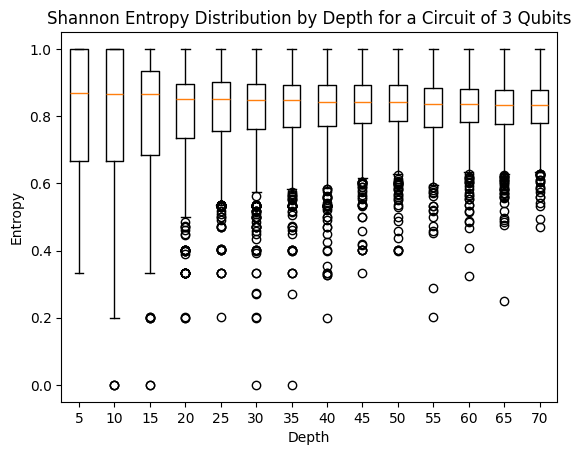

In [14]:
import pandas as pd

df = pd.read_csv('shannon_data_depth.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Circuit of 3 Qubits')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

**Interpretation:** With an increasing depth and 3 qubits, the Shannon entropy seems to average out to around 0.85, but with a higher number of "less random" outliers than random circuits of 4 qubits. This makes sense because systems with 3 qubits have less possible states than systems with 4 qubits, making it "harder" to achieve randomness.

# Calculating the Shannon Entropy of a Periodic Random Circuit

The code below calculates the Shannon entropy for a number of "periodic random circuits" (mentioned earlier in the notebook) and plots the data on a boxplot. When num_layers is set to 100, the circuit ends up reaching a depth of 400 (because the period is equal to the number of qubits).

In [76]:
import csv
def periodic_shannon(num_qubits, num_layers, trials) :
    outliers = []
    shan_entries = []
    for k in range(trials) :
        for i in range(num_layers) :
            if i==0 :
                continue
            else :
                temp = create_periodic_random(num_qubits, num_qubits, i)
                shan = calculate_shannon_entropy(temp, num_qubits, False)
                shan = shan/num_qubits
                shan_entries.append((i*5, shan))

    with open('shannon_data_periodic.csv', 'w', newline='') as csvfile :
        writer = csv.writer(csvfile)
        writer.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in shan_entries:
            writer.writerow([depth, entropy])


In [77]:
periodic_shannon(4, 100, 100)

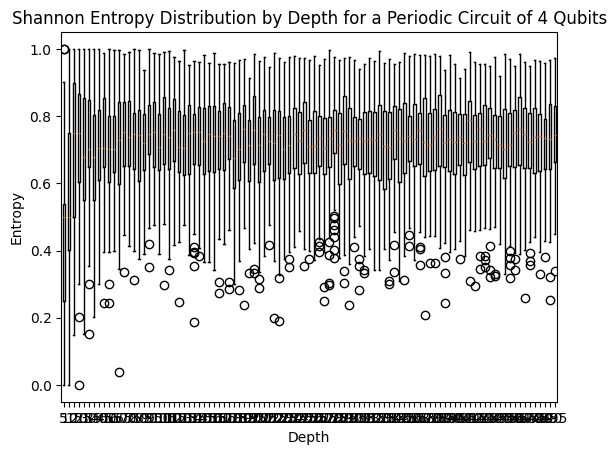

In [78]:
import pandas as pd

df = pd.read_csv('shannon_data_periodic.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Periodic Circuit of 4 Qubits')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

**Interpretation:** This data shows that the entropy of periodic random circuits (using only single qubit gates) once again, on average is closer to 1 than 0. From this figure, the average Shannon entropy is estimated to be around 0.72 as circuit depth increases into the hundreds.

# Calculating Von Neumann Entropy of a Quantum System

Similarly to what I was doing earlier with Shannon entropy, I created a function to calculate the Von Neumann entropy for a given circuit. This involved extracting the density matrix from the final outputstate from a given circuit, finding its eigenvalues, and then using the shannon_entropy function from earlier (which essentially sums over the probabilities multiplied by the logarithm of the probabilities) to calculate the Von Neumann entropy.

In [13]:
import numpy as np
import scipy.linalg as la
from qiskit.exceptions import QiskitError
from qiskit.quantum_info.states.densitymatrix import DensityMatrix, Statevector
from qiskit.quantum_info.states.utils import (partial_trace, shannon_entropy,
                                              _format_state, _funm_svd)

def calculate_vn_entropy(qc, num, draw=False) :
    backend = qiskit_aer.Aer.get_backend('statevector_simulator')
    new_qc = transpile(qc, backend=backend)
    job = backend.run(new_qc, shots = 1024)
    result = job.result()
    out = result.get_statevector(new_qc)
    rho = DensityMatrix(out)
    use = rho.data[-1]
    num_elements = num**2
    state = []
    for i in range(0, len(use), num):
        state.append(use[i:i + num])
    evals = np.maximum(np.real(la.eigvals(state)), 0.)
    return shannon_entropy(evals, base=2)

## Example Circuit to Show Functionality

The code below creates a simple circuit, and then calculates both its Von Neumann entropy as well as its Shannon entropy and then prints them both, respectively.

In [137]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.ry(0.82, 1)
qc.rz(0.22, 0)
qc.cx(0,1)
qc.cz(1, 0)
vn = calculate_vn_entropy(qc,2, False)
print(vn)
shan = calculate_shannon_entropy(qc, 2, False)
shan=shan/2
print(shan)

0.44824035012464414
0.784727833396967


## Plotting the Average Shannon Entropy for a Given Qubit Size and Varying Depth

In [25]:
import csv
def run_vn_entropies_by_depth(num_qubits, depth, trials) :
    vn_entries = []
    for k in range(trials) :
        for i in range(depth) :
            if i==0 :
                continue
            else :
                temp = fully_random_sized_circuit(num_qubits,i*5, False)
                vn = calculate_vn_entropy(temp, num_qubits, False)
                vn = vn/num_qubits
                vn_entries.append((i*5, vn))

    with open('vn_data_depth.csv', 'w', newline='') as csvfile :
        writer = csv.writer(csvfile)
        writer.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in vn_entries:
            writer.writerow([depth, entropy])

In [26]:
run_vn_entropies_by_depth(4, 15, 100)

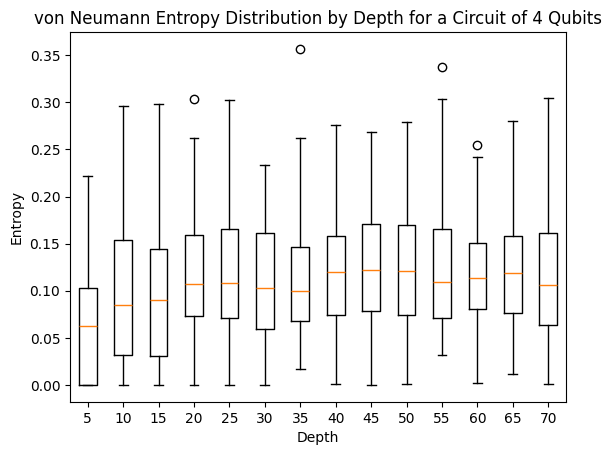

In [27]:
import pandas as pd
import numpy


df = pd.read_csv('vn_data_depth.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('von Neumann Entropy Distribution by Depth for a Circuit of 4 Qubits')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')


plt.show()

**Interpretation:** With an increasing depth and 4 qubits, the Von Neumann entropy seems to average out to around 0.1, telling me that the deeper random circuits I made create states just as "pure" as more shallow circuits on average (since a Von Neumann entropy closer to 0 represents pure states and a Von Neumann entropy closer to 1 reflects mixed states).

# Calculating the Shannon Entropy for Random Circuits in Z-basis, X-basis, and Y-basis

Because qiskit automatically measures the statevector in the Z basis, I will be using a form of shadow tomography to extract the Shannon entropies from random circuits in the X, Y, and Z bases. Comparing the Shannon entropies in different bases will give us a better idea of how "random" the circuit truly is, because systems that are random in one basis, may be completely predictable in another.

In [10]:
import csv
def run_tomography_by_depth(num_qubits, depth, trials) :
    shan_entriesX = []
    shan_entriesY = []
    shan_entriesZ = []
    for k in range(trials) :
        for i in range(depth) :
            if i==0 :
                continue
            else :
                tempZ = fully_random_sized_circuit(num_qubits,i*5, False)
                tempX = tempZ.copy()
                tempY = tempZ.copy()
                for k in range(num_qubits) :
                    tempX.h(k)
                for j in range(num_qubits) :
                    tempY.sdg(j)
                    tempY.h(j)
                shanZ = calculate_shannon_entropy(tempZ, num_qubits, False)
                shanZ = shanZ/num_qubits
                shan_entriesZ.append((i*5, shanZ))
                shanX = calculate_shannon_entropy(tempX, num_qubits, False)
                shanX = shanX/num_qubits
                shan_entriesX.append((i*5, shanX))
                shanY = calculate_shannon_entropy(tempY, num_qubits, False)
                shanY = shanY/num_qubits
                shan_entriesY.append((i*5, shanY))

    with open('shannon_data_depth_Z.csv', 'w', newline='') as csvfile :
        writer1 = csv.writer(csvfile)
        writer1.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in shan_entriesZ:
            writer1.writerow([depth, entropy])

    with open('shannon_data_depth_X.csv', 'w', newline='') as csvfile :
        writer2 = csv.writer(csvfile)
        writer2.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in shan_entriesX:
            writer2.writerow([depth, entropy])

    with open('shannon_data_depth_Y.csv', 'w', newline='') as csvfile :
        writer3 = csv.writer(csvfile)
        writer3.writerow(['Depth', 'Entropy'])
    
        for depth, entropy in shan_entriesY:
            writer3.writerow([depth, entropy])


In [11]:
run_tomography_by_depth(4, 15, 100)

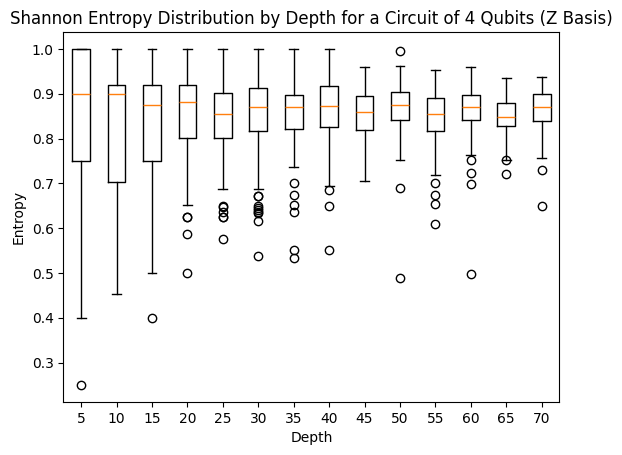

In [12]:
import pandas as pd

df = pd.read_csv('shannon_data_depth_Z.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Circuit of 4 Qubits (Z Basis)')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

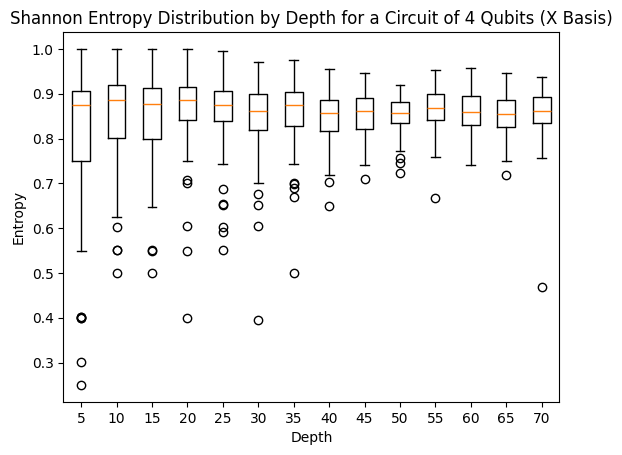

In [13]:
import pandas as pd

df = pd.read_csv('shannon_data_depth_X.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Circuit of 4 Qubits (X Basis)')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

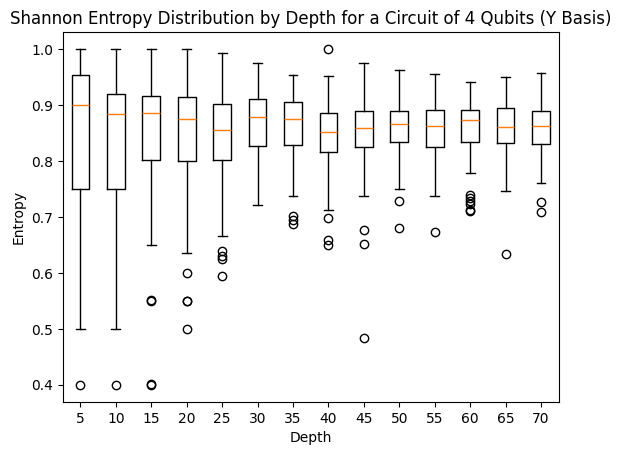

In [14]:
import pandas as pd

df = pd.read_csv('shannon_data_depth_Y.csv')
grouped_data = df.groupby('Depth')['Entropy'].apply(list).reset_index(name='Entropies')
data_to_plot = [row['Entropies'] for index, row in grouped_data.iterrows()]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot)
ax.set_xticklabels(grouped_data['Depth'].astype(str))
ax.set_title('Shannon Entropy Distribution by Depth for a Circuit of 4 Qubits (Y Basis)')
ax.set_xlabel('Depth')
ax.set_ylabel('Entropy')
plt.show()

**Interpretation:** All of the plots of average entropy look similar, which makes sense because a random series of gates which randomly applies operations in different bases should produce similar graphs for every basis (especially when the depth is more than 10, because the proability that a gate has been applied to a certain qubit to randomize it in every basis is higher).